In [1]:
import sys
import math
import cv2 as cv
import numpy as np
from PIL import Image, ImageOps, ImageChops
import PIL
import matplotlib.pyplot as plt

In [7]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print(f'{subindent}{f}')

# Specify the directory you want to start from
start_directory = '/Users/izzymohamed/Downloads/Cherry'
list_files(start_directory)


Cherry/
    .DS_Store
    TreeMapping.xlsx
    ReadMe.pdf
    16_09_2021/
        16_09_2021/
            16_09_2021.csv
            Ground_Multispectral_Photos/
                Healthy/
                    10-43/
                        IMG_700101_004444_0000_NIR.TIF
                        sequoia_diag.dat
                        IMG_700101_004444_0000_RED.TIF
                        IMG_700101_004444_0000_REG.TIF
                        IMG_700101_004444_0000_GRE.TIF
                        sequoia_param.dat
                        IMG_700101_004444_0000_RGB.JPG
                    6-67/
                        IMG_160101_000747_0000_NIR.TIF
                        sequoia_diag.dat
                        IMG_160101_000747_0000_GRE.TIF
                        IMG_160101_000747_0000_RED.TIF
                        IMG_160101_000747_0000_REG.TIF
                        sequoia_param.dat
                        IMG_160101_000747_0000_RGB.JPG
                    9-10/
                  

In [19]:
import os
import shutil

def fix_data_structure(root_dir):
    stages = ['Armillaria_Stage_1', 'Armillaria_Stage_2', 'Armillaria_Stage_3', 'Healthy']
    
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.jpg'):  # Process only jpg files
                # Extract parts from the path
                parts = subdir.split(os.sep)
                if len(parts) >= 6:
                    date_part = parts[5]  # Extracting date from the path
                    current_stage = parts[-1]  # Current stage directory name
                    # current_stage = parts[-1]  # Current stage directory name
                    # print(date_part)
                    # print(current_stage)
                    
                    if current_stage in stages:
                        new_subdir = os.path.join(root_dir, 'Ground_RGB_Photos', current_stage)
                        new_filename = f'{date_part}-{file}'
                        
                        # Ensure the new directory exists
                        os.makedirs(new_subdir, exist_ok=True)
                        
                        # Construct full source and destination paths
                        old_path = os.path.join(subdir, file)
                        new_path = os.path.join(new_subdir, new_filename)

                        # print(new_subdir)
                        
                        # Move the file
                        shutil.move(old_path, new_path)
                        print(f'Moved: {old_path} -> {new_path}')

# Define the root directory
root_directory = '/Users/izzymohamed/Downloads/Cherry v2'
fix_data_structure(root_directory)

Moved: /Users/izzymohamed/Downloads/Cherry v2/16_09_2021/16_09_2021/Ground_RGB_Photos/Healthy/11-7.jpg -> /Users/izzymohamed/Downloads/Cherry v2/Ground_RGB_Photos/Healthy/16_09_2021-11-7.jpg
Moved: /Users/izzymohamed/Downloads/Cherry v2/16_09_2021/16_09_2021/Ground_RGB_Photos/Healthy/8-13.jpg -> /Users/izzymohamed/Downloads/Cherry v2/Ground_RGB_Photos/Healthy/16_09_2021-8-13.jpg
Moved: /Users/izzymohamed/Downloads/Cherry v2/16_09_2021/16_09_2021/Ground_RGB_Photos/Healthy/6-16.jpg -> /Users/izzymohamed/Downloads/Cherry v2/Ground_RGB_Photos/Healthy/16_09_2021-6-16.jpg
Moved: /Users/izzymohamed/Downloads/Cherry v2/16_09_2021/16_09_2021/Ground_RGB_Photos/Healthy/10-51.jpg -> /Users/izzymohamed/Downloads/Cherry v2/Ground_RGB_Photos/Healthy/16_09_2021-10-51.jpg
Moved: /Users/izzymohamed/Downloads/Cherry v2/16_09_2021/16_09_2021/Ground_RGB_Photos/Healthy/10-45.jpg -> /Users/izzymohamed/Downloads/Cherry v2/Ground_RGB_Photos/Healthy/16_09_2021-10-45.jpg
Moved: /Users/izzymohamed/Downloads/Cherr

In [2]:
orignial_path = "/Users/izzymohamed/Downloads/Cherry/03_11_2021/Aerial_UAV_photos/"

red = Image.open(orignial_path + "red.data.tif")

nir = Image.open(orignial_path + "nir.data.tif")

rededge = Image.open(orignial_path + "rededge.data.tif")

nir = np.asarray(nir)
red = np.asarray(red)
rededge = np.asarray(rededge)

ndvi = np.zeros([nir.shape[0], nir.shape[1], 3], dtype=np.uint8)
ndviData = np.zeros(nir.shape[0])
ndviData = (nir - red) / (nir + red)

for i in range(0, ndviData.shape[0]): 
    for j in range(0, ndviData.shape[1]):
        if (ndviData[i][j] < 0):
            ndvi[i][j][0] = 0
            ndvi[i][j][1] = 0
            ndvi[i][j][2] = 0
        elif (ndviData[i][j] > 0):
            if(ndviData[i][j] > 0 and ndviData[i][j] < 0.06):
                ndvi[i][j][0] = 255
                ndvi[i][j][1] = 0
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.06 and ndviData[i][j] < 0.12):
                ndvi[i][j][0] = 255
                ndvi[i][j][1] = 32
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.12 and ndviData[i][j] < 0.18):
                ndvi[i][j][0] = 255
                ndvi[i][j][1] = 64
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.18 and ndviData[i][j] < 0.24):
                ndvi[i][j][0] = 255
                ndvi[i][j][1] = 96
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.24 and ndviData[i][j] < 0.30):
                ndvi[i][j][0] = 255
                ndvi[i][j][1] = 128
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.30 and ndviData[i][j] < 0.36):
                ndvi[i][j][0] = 255
                ndvi[i][j][1] = 160
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.36 and ndviData[i][j] < 0.42):
                ndvi[i][j][0] = 255
                ndvi[i][j][1] = 192
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.42 and ndviData[i][j] < 0.48):
                ndvi[i][j][0] = 255
                ndvi[i][j][1] = 224
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.48 and ndviData[i][j] < 0.54):
                ndvi[i][j][0] = 255
                ndvi[i][j][1] = 240
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.54 and ndviData[i][j] < 0.60):
                ndvi[i][j][0] = 224
                ndvi[i][j][1] = 255
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.60 and ndviData[i][j] < 0.66):
                ndvi[i][j][0] = 192
                ndvi[i][j][1] = 255
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.66 and ndviData[i][j] < 0.72):
                ndvi[i][j][0] = 176
                ndvi[i][j][1] = 255
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.72 and ndviData[i][j] < 0.78):
                ndvi[i][j][0] = 160
                ndvi[i][j][1] = 255
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.78 and ndviData[i][j] < 0.84):
                ndvi[i][j][0] = 144
                ndvi[i][j][1] = 255
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.84 and ndviData[i][j] < 0.90):
                ndvi[i][j][0] = 64
                ndvi[i][j][1] = 255
                ndvi[i][j][2] = 0
            elif (ndviData[i][j]> 0.90):
                ndvi[i][j][0] = 16
                ndvi[i][j][1] = 255
                ndvi[i][j][2] = 0

pil_image=Image.fromarray(ndvi)
img = pil_image
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)
img.save(orignial_path + "ndvi.png", "PNG")

In [3]:
import rasterio

# Open the .tif file
with rasterio.open('/Users/izzymohamed/Downloads/Cherry/03_11_2021/Aerial_UAV_photos/NDVI.rgb.tif') as dataset:
    # Print the CRS (Coordinate Reference System)
    print("CRS:", dataset.crs)

    # Print the bounds of the image
    print("Bounds:", dataset.bounds)

    # Print the transform attribute
    print("Transform:", dataset.transform)

    # Get the coordinates of the corners
    print("Corner coordinates:")
    print("Top-left:", (dataset.bounds.left, dataset.bounds.top))
    print("Bottom-right:", (dataset.bounds.right, dataset.bounds.bottom))


CRS: EPSG:32634
Bounds: BoundingBox(left=567520.9786208514, bottom=4517891.009635419, right=567669.2541403278, top=4517996.30376298)
Transform: | 0.07, 0.00, 567520.98|
| 0.00,-0.07, 4517996.30|
| 0.00, 0.00, 1.00|
Corner coordinates:
Top-left: (567520.9786208514, 4517996.30376298)
Bottom-right: (567669.2541403278, 4517891.009635419)


In [4]:
from pyproj import Proj, transform

# Define the UTM projection (EPSG:32634) and WGS84 projection (EPSG:4326)
utm_proj = Proj(init='epsg:32634')
wgs84_proj = Proj(init='epsg:4326')

# UTM coordinates for top-left and bottom-right corners
utm_top_left = (567520.9786208514, 4517996.30376298)
utm_bottom_right = (567669.2541403278, 4517891.009635419)

# Convert UTM to latitude/longitude
lat_lon_top_left = transform(utm_proj, wgs84_proj, utm_top_left[0], utm_top_left[1])
lat_lon_bottom_right = transform(utm_proj, wgs84_proj, utm_bottom_right[0], utm_bottom_right[1])

print("Top-left corner (lat, lon):", lat_lon_top_left)
print("Bottom-right corner (lat, lon):", lat_lon_bottom_right)


Top-left corner (lat, lon): (21.80055485487009, 40.810201743119926)
Bottom-right corner (lat, lon): (21.80230127825006, 40.80924107963907)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/qd/ds8njzhn1zv9q727vvvr8h0m0000gn/T/ipykernel_94438/1198192115.py:12: FutureWarning: This function is deprecated. See: https://pyproj

In [5]:
import shapefile
from pyproj import Proj, transform

# Define the UTM projection (EPSG:32634) and WGS84 projection (EPSG:4326)
utm_proj = Proj(init='epsg:32634')
wgs84_proj = Proj(init='epsg:4326')

# UTM coordinates for all four corners
utm_top_left = (567520.9786208514, 4517996.30376298)
utm_top_right = (567669.2541403278, 4517996.30376298)
utm_bottom_right = (567669.2541403278, 4517891.009635419)
utm_bottom_left = (567520.9786208514, 4517891.009635419)

# Convert UTM to latitude/longitude
lat_lon_top_left = transform(utm_proj, wgs84_proj, utm_top_left[0], utm_top_left[1])
lat_lon_top_right = transform(utm_proj, wgs84_proj, utm_top_right[0], utm_top_right[1])
lat_lon_bottom_right = transform(utm_proj, wgs84_proj, utm_bottom_right[0], utm_bottom_right[1])
lat_lon_bottom_left = transform(utm_proj, wgs84_proj, utm_bottom_left[0], utm_bottom_left[1])

# Create a list of polygon coordinates
polygon_coordinates = [
    lat_lon_top_left,
    lat_lon_top_right,
    lat_lon_bottom_right,
    lat_lon_bottom_left,
    lat_lon_top_left  # Closing the polygon
]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/qd/ds8njzhn1zv9q727vvvr8h0m0000gn/T/ipykernel_94438/2771827636.py:15: FutureWarning: This function is deprecated. See: https://pyproj

In [6]:
polygon_coordinates

[(21.80055485487009, 40.810201743119926),
 (21.802312702755422, 40.81018953252048),
 (21.80230127825006, 40.80924107963907),
 (21.80054345538902, 40.80925328983259),
 (21.80055485487009, 40.810201743119926)]

In [16]:
import folium
from shapely.geometry import Polygon, mapping
import geopandas as gpd
import matplotlib.pyplot as plt
from folium import GeoJson

# Create a Polygon object from the coordinates
polygon = Polygon(polygon_coordinates)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame([{'geometry': polygon, 'name': 'polygon'}], crs="EPSG:4326")

# Get the center of the polygon to center the map
polygon_center = [polygon.centroid.y, polygon.centroid.x]

# Create a Folium map centered at the polygon's centroid with a satellite base layer
m = folium.Map(location=polygon_center, zoom_start=30, tiles=None)

# Add the satellite tile layer
folium.TileLayer(tiles='https://{s}.google.com/vt/lyrs=s&x={x}&y={y}&z={z}', 
                 attr='Google Satellite', 
                 name='Google Satellite', 
                 subdomains=['mt0', 'mt1', 'mt2', 'mt3']).add_to(m)

# Add the polygon to the map
geo_json = GeoJson(gdf)
geo_json.add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Save the map to an HTML file
m.save('polygon_map.html')

# Display the map
m

/var/folders/qd/ds8njzhn1zv9q727vvvr8h0m0000gn/T/ipykernel_94438/2412562187.py:18: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon_lat_top_left = pyproj.transform(utm_proj, wgs84_proj, *utm_top_left)
/var/folders/qd/ds8njzhn1zv9q727vvvr8h0m0000gn/T/ipykernel_94438/2412562187.py:19: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon_lat_top_right = pyproj.transform(utm_proj, wgs84_proj, *utm_top_right)
/var/folders/qd/ds8njzhn1zv9q727vvvr8h0m0000gn/T/ipykernel_94438/2412562187.py:20: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon_lat_bottom_right = pyproj.transform(utm_proj, wgs84_proj, *utm_bottom_right)
/var/folders/qd/ds8njzhn1zv9q727vvvr8h0m0000gn/T/ipykernel_94438/2412562187.py:21: FutureWarning: This

NDVI Image URL: https://earthengine.googleapis.com/v1/projects/earthengine-legacy/thumbnails/7bada9324af75f7442ab582376a7bcbd-178325ab1b3491ed258767efc6c60692:getPixels


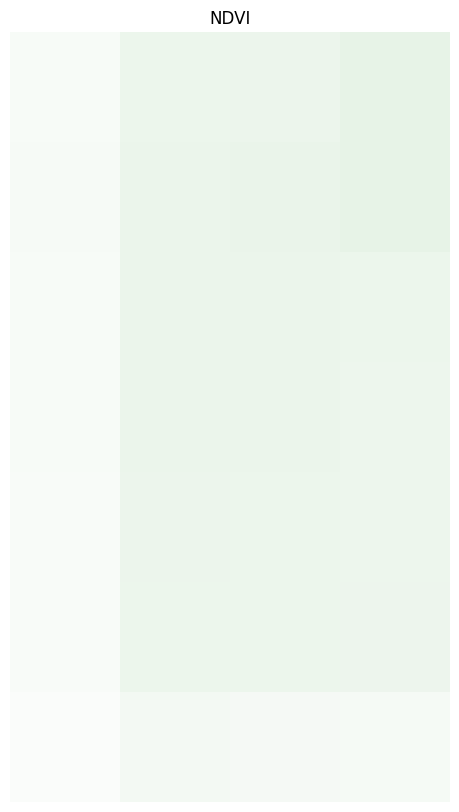

In [19]:
import ee
import pyproj

# Initialize the Earth Engine module.
ee.Initialize()

# Define the UTM projection (EPSG:32634) and WGS84 projection (EPSG:4326)
utm_proj = pyproj.Proj('epsg:32634')
wgs84_proj = pyproj.Proj('epsg:4326')

# UTM coordinates for all four corners
utm_top_left = (567520.9786208514, 4517996.30376298)
utm_top_right = (567669.2541403278, 4517996.30376298)
utm_bottom_right = (567669.2541403278, 4517891.009635419)
utm_bottom_left = (567520.9786208514, 4517891.009635419)

# Convert UTM to latitude/longitude
lon_lat_top_left = pyproj.transform(utm_proj, wgs84_proj, *utm_top_left)
lon_lat_top_right = pyproj.transform(utm_proj, wgs84_proj, *utm_top_right)
lon_lat_bottom_right = pyproj.transform(utm_proj, wgs84_proj, *utm_bottom_right)
lon_lat_bottom_left = pyproj.transform(utm_proj, wgs84_proj, *utm_bottom_left)

# Create a list of polygon coordinates
polygon_coordinates = [
    [lon_lat_top_left[0], lon_lat_top_left[1]],
    [lon_lat_top_right[0], lon_lat_top_right[1]],
    [lon_lat_bottom_right[0], lon_lat_bottom_right[1]],
    [lon_lat_bottom_left[0], lon_lat_bottom_left[1]],
    [lon_lat_top_left[0], lon_lat_top_left[1]]  # Closing the polygon
]

# Create a polygon in Earth Engine
roi = ee.Geometry.Polygon([polygon_coordinates])

# Load a Landsat 8 image collection
collection = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA') \
    .filterBounds(roi) \
    .filterDate('2020-01-01', '2020-12-31') \
    .sort('CLOUD_COVER') \
    .first()

# Select the red and NIR bands
image = collection.select(['B4', 'B5'])

# Calculate NDVI
ndvi = image.normalizedDifference(['B5', 'B4'])

# Clip the NDVI image to the region of interest
ndvi_clipped = ndvi.clip(roi)

# Get a URL for the NDVI image
ndvi_url = ndvi_clipped.getThumbURL({
    'min': -1, 'max': 1, 'palette': ['blue', 'white', 'green'],
    'region': roi
})

print('NDVI Image URL:', ndvi_url)

# Display the NDVI image
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

response = requests.get(ndvi_url)
image = Image.open(BytesIO(response.content))

plt.figure(figsize=(10, 10))
plt.title('NDVI')
plt.imshow(image)
plt.axis('off')
plt.show()

In [25]:
import ee
import folium
import pyproj

# Authenticate and initialize the Earth Engine API
ee.Authenticate()
ee.Initialize()

# Define the UTM projection (EPSG:32634) and WGS84 projection (EPSG:4326)
utm_proj = pyproj.Proj('epsg:32634')
wgs84_proj = pyproj.Proj('epsg:4326')

# UTM coordinates for all four corners
utm_top_left = (567520.9786208514, 4517996.30376298)
utm_top_right = (567669.2541403278, 4517996.30376298)
utm_bottom_right = (567669.2541403278, 4517891.009635419)
utm_bottom_left = (567520.9786208514, 4517891.009635419)

# Convert UTM to latitude/longitude
lon_lat_top_left = pyproj.transform(utm_proj, wgs84_proj, *utm_top_left)
lon_lat_top_right = pyproj.transform(utm_proj, wgs84_proj, *utm_top_right)
lon_lat_bottom_right = pyproj.transform(utm_proj, wgs84_proj, *utm_bottom_right)
lon_lat_bottom_left = pyproj.transform(utm_proj, wgs84_proj, *utm_bottom_left)

# Create a list of polygon coordinates
polygon_coordinates = [
    [lon_lat_top_left[0], lon_lat_top_left[1]],
    [lon_lat_top_right[0], lon_lat_top_right[1]],
    [lon_lat_bottom_right[0], lon_lat_bottom_right[1]],
    [lon_lat_bottom_left[0], lon_lat_bottom_left[1]],
    [lon_lat_top_left[0], lon_lat_top_left[1]]  # Closing the polygon
]

# Create a polygon in Earth Engine
roi = ee.Geometry.Polygon([polygon_coordinates])

# Load the Sentinel-2 dataset and filter it by date
dataset = ee.ImageCollection('COPERNICUS/S2') \
                  .filterDate('2021-01-01', '2021-12-31') \
                  .filterBounds(roi) \
                  .map(lambda image: image.normalizedDifference(['B8', 'B4']).rename('NDVI'))

# Select the NDVI band
colorized = dataset.select('NDVI')

# Visualization parameters
colorizedVis = {
  'min': -1,
  'max': 1,
  'palette': [
    'ffffff', 'ce7e45', 'df923d', 'f1b555', 'fcd163', '99b718', '74a901',
    '66a000', '529400', '3e8601', '207401', '056201', '004c00', '023b01',
    '012e01', '011d01', '011301'
  ],
}

# Calculate the mean NDVI image
meanNDVI = colorized.mean()

# Create a folium map
center = [sum(x) / len(x) for x in zip(*polygon_coordinates)]
m = folium.Map(location=center, zoom_start=10)

# Add the NDVI layer to the map
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

folium.Map.add_ee_layer = add_ee_layer
folium.Map.add_ee_layer(m, meanNDVI, colorizedVis, 'Colorized NDVI')

# Add a layer control panel to the map
m.add_child(folium.LayerControl())

# Display the map
m.save('ndvi_map.html')
print('Map saved as ndvi_map.html')

# Export the image to Google Drive
export_task = ee.batch.Export.image.toDrive(**{
    'image': meanNDVI,
    'description': 'Colorized_NDVI',
    'scale': 10,  # Sentinel-2 resolution
    'region': roi,
    'maxPixels': 1e13,
    'fileFormat': 'GeoTIFF'
})
export_task.start()
print('Export started, check Google Drive for results.')

/var/folders/qd/ds8njzhn1zv9q727vvvr8h0m0000gn/T/ipykernel_79633/2530830740.py:20: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon_lat_top_left = pyproj.transform(utm_proj, wgs84_proj, *utm_top_left)
/var/folders/qd/ds8njzhn1zv9q727vvvr8h0m0000gn/T/ipykernel_79633/2530830740.py:21: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon_lat_top_right = pyproj.transform(utm_proj, wgs84_proj, *utm_top_right)
/var/folders/qd/ds8njzhn1zv9q727vvvr8h0m0000gn/T/ipykernel_79633/2530830740.py:22: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon_lat_bottom_right = pyproj.transform(utm_proj, wgs84_proj, *utm_bottom_right)
/var/folders/qd/ds8njzhn1zv9q727vvvr8h0m0000gn/T/ipykernel_79633/2530830740.py:23: FutureWarning: This

Map saved as ndvi_map.html
Export started, check Google Drive for results.
